In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

https://www.kaggle.com/datasets/ibrahimbahbah/drug200

## Data Loading

In [2]:
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [6]:
df['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

In [7]:
df['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

In [8]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [9]:
kat = ['Sex', 'BP', 'Cholesterol']

## LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
df['Drug'] = le.fit_transform(df[['Drug']])

## MinMax Scaler

In [12]:
mx = MinMaxScaler()

In [13]:
df['Age'] = mx.fit_transform(df[['Age']])
df['Na_to_K'] = mx.fit_transform(df[['Na_to_K']])

In [14]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.135593,F,HIGH,HIGH,0.596848,0
1,0.542373,M,LOW,HIGH,0.213397,3
2,0.542373,M,LOW,HIGH,0.120239,3
3,0.220339,F,NORMAL,HIGH,0.047814,4
4,0.779661,F,LOW,HIGH,0.368191,0


In [15]:
df['Drug'].value_counts()

0    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64

1. DrugY  = 0
2. drugX  = 4
3. drugA  = 1
4. drugC  = 3
5. drugB  = 2

## One Hot Encoder

In [16]:
for cat in kat:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [17]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug', 'Sex_F', 'Sex_M',
       'BP_HIGH', 'BP_LOW', 'BP_NORMAL', 'Cholesterol_HIGH',
       'Cholesterol_NORMAL'],
      dtype='object')

In [18]:
df.shape

(200, 13)

In [19]:
df.drop(["Sex"], axis=1, inplace=True)
df.drop(["BP"], axis=1, inplace=True)
df.drop(["Cholesterol"], axis=1, inplace=True)

In [20]:
df.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,0.135593,0.596848,0,1,0,1,0,0,1,0
1,0.542373,0.213397,3,0,1,0,1,0,1,0
2,0.542373,0.120239,3,0,1,0,1,0,1,0
3,0.220339,0.047814,4,1,0,0,0,1,1,0
4,0.779661,0.368191,0,1,0,0,1,0,1,0


## Split Data

In [21]:
X = df.drop(columns = ['Drug'])
y = df['Drug'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 9), (60, 9), (140,), (60,))

In [23]:
y_test

array([3, 4, 0, 0, 0, 4, 4, 4, 0, 4, 1, 0, 0, 0, 2, 3, 0, 0, 4, 0, 0, 4,
       4, 4, 0, 0, 0, 0, 0, 4, 4, 3, 1, 4, 0, 0, 4, 0, 1, 4, 0, 1, 0, 4,
       0, 4, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 4, 4, 0, 2])

1. DrugY  = 0  = 30 
2. drugX  = 4  = 18
3. drugA  = 1  =  5
4. drugC  = 3  =  4
5. drugB  = 2  =  3

## Decision Tree

In [24]:
dt_model = DecisionTreeClassifier(random_state = 0)

In [25]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
dt_model_pred = dt_model.predict(X_test)

In [27]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, dt_model_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, dt_model_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, dt_model_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, dt_model_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, dt_model_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, dt_model_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, dt_model_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, dt_model_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, dt_model_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, dt_model_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, dt_model_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        30
     Class 1       1.00      1.00      1.00         5
     Class 2       1.00      1.00      1.00         3
     Class 3       1.00      1.00      1.00         4
     Class 4       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [28]:
cm_dt = confusion_matrix(y_test, dt_model_pred)
print('Confusion Matrix\n')
print(cm_dt)

Confusion Matrix

[[30  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


Text(0.5, 1.0, 'Confusion Matrix')

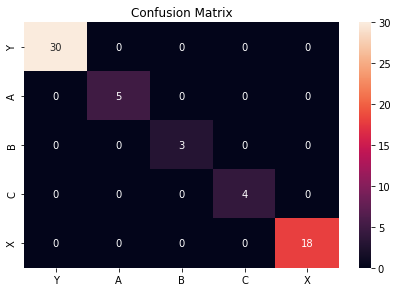

In [29]:
kelas=['Y', 'A', 'B', 'C', 'X']
fig, ax = plt.subplots()

#Heatmap
sns.heatmap(pd.DataFrame(cm_dt), annot=True, xticklabels=kelas, yticklabels=kelas)
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix')

## SVM

In [30]:
svc_model = SVC(random_state = 0)

In [31]:
svc_model.fit(X_train, y_train)

SVC(random_state=0)

In [32]:
svc_model_pred = svc_model.predict(X_test)

In [33]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, svc_model_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, svc_model_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, svc_model_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, svc_model_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, svc_model_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, svc_model_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, svc_model_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, svc_model_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, svc_model_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, svc_model_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, svc_model_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']))


Accuracy: 0.75

Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75

Macro Precision: 0.71
Macro Recall: 0.73
Macro F1-score: 0.71

Weighted Precision: 0.77
Weighted Recall: 0.75
Weighted F1-score: 0.74

Classification Report

              precision    recall  f1-score   support

     Class 0       0.83      0.63      0.72        30
     Class 1       0.75      0.60      0.67         5
     Class 2       0.50      0.67      0.57         3
     Class 3       0.75      0.75      0.75         4
     Class 4       0.72      1.00      0.84        18

    accuracy                           0.75        60
   macro avg       0.71      0.73      0.71        60
weighted avg       0.77      0.75      0.74        60



In [34]:
cm_svc = confusion_matrix(y_test, svc_model_pred)
print('Confusion Matrix\n')
print(cm_svc)

Confusion Matrix

[[19  1  2  1  7]
 [ 2  3  0  0  0]
 [ 1  0  2  0  0]
 [ 1  0  0  3  0]
 [ 0  0  0  0 18]]


Text(0.5, 1.0, 'Confusion Matrix')

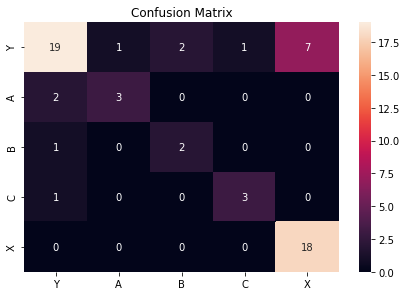

In [35]:
kelas=['Y', 'A', 'B', 'C', 'X']
fig, ax = plt.subplots()

#Heatmap
sns.heatmap(pd.DataFrame(cm_svc), annot=True, xticklabels=kelas, yticklabels=kelas)
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix')

## KNN

In [36]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [37]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
knn_model_pred = knn_model.predict(X_test)

In [39]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, knn_model_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, knn_model_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, knn_model_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, knn_model_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, knn_model_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, knn_model_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, knn_model_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, knn_model_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, knn_model_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, knn_model_pred, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, knn_model_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']))


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.72
Macro Recall: 0.76
Macro F1-score: 0.73

Weighted Precision: 0.75
Weighted Recall: 0.73
Weighted F1-score: 0.73

Classification Report

              precision    recall  f1-score   support

     Class 0       0.82      0.60      0.69        30
     Class 1       0.60      0.60      0.60         5
     Class 2       0.50      0.67      0.57         3
     Class 3       1.00      1.00      1.00         4
     Class 4       0.68      0.94      0.79        18

    accuracy                           0.73        60
   macro avg       0.72      0.76      0.73        60
weighted avg       0.75      0.73      0.73        60



In [40]:
cm_knn = confusion_matrix(y_test, knn_model_pred)
print('Confusion Matrix\n')
print(cm_knn)

Confusion Matrix

[[18  2  2  0  8]
 [ 2  3  0  0  0]
 [ 1  0  2  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]


Text(0.5, 1.0, 'Confusion Matrix')

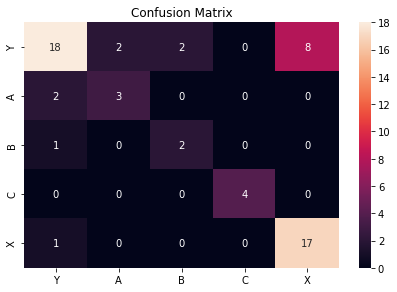

In [41]:
kelas=['Y', 'A', 'B', 'C', 'X']
fig, ax = plt.subplots()

#Heatmap
sns.heatmap(pd.DataFrame(cm_knn), annot=True, xticklabels=kelas, yticklabels=kelas)
ax.xaxis.set_label_position('bottom')
plt.tight_layout()
plt.title('Confusion Matrix')